In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../data/chess_games_clean.csv')

Se muestra en el histograma si hay diferencias de rating entre los jugadores que juegan con las piezas blancas y los que juegan con las piezas negras. Como se puede observar, las diferencias son mínimas y no hay una tendencia clara.

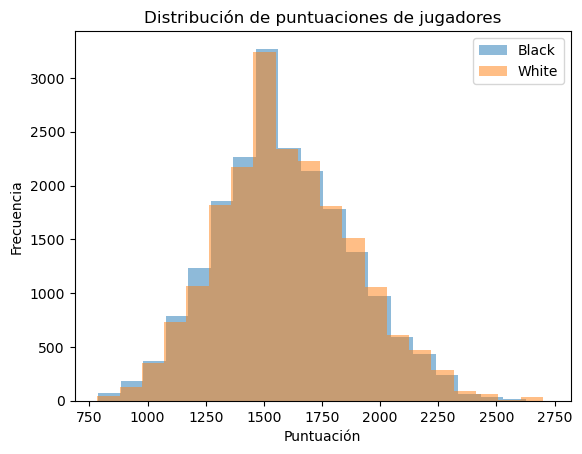

In [37]:
plt.hist(df['black_rating'], bins=20, alpha=0.5, label='Black')
plt.hist(df['white_rating'], bins=20, alpha=0.5, label='White')

plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntuaciones de jugadores')
plt.legend(loc='upper right')

plt.show()

En el boxplot se puede observar que la mayoria de los jugadores tienen un rating entre 1300 y 1800 aproximadamente.

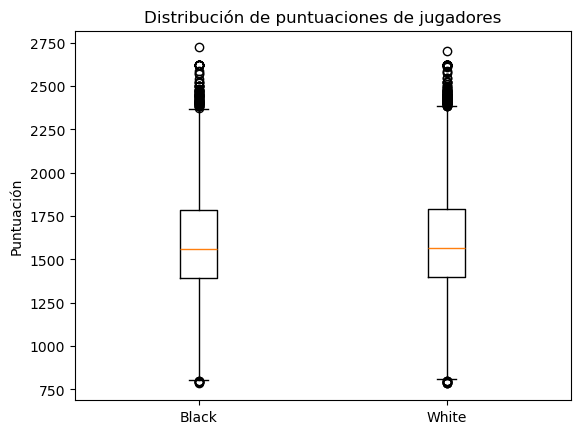

In [38]:
plt.boxplot([df['black_rating'], df['white_rating']], labels=['Black', 'White'])
plt.ylabel('Puntuación')
plt.title('Distribución de puntuaciones de jugadores')

plt.show()

Se muestra un gráfico de barras con el conteo de las 10 aperturas más populares, para observar como juega la mayoría de los jugadores. La apertura más popular es la defensa siciliana, seguida de la defensa francesa.

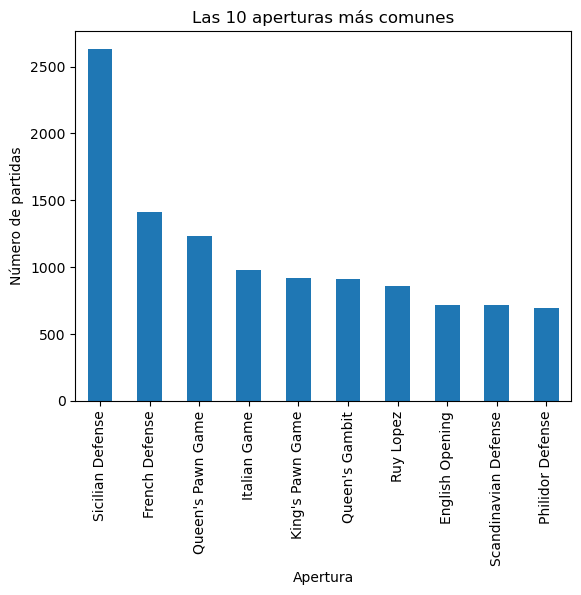

In [39]:
df['opening_shortname'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Número de partidas')
plt.xlabel('Apertura')
plt.title('Las 10 aperturas más comunes')

plt.show()

Se busca correlaciones en todo el dataset, y se encuentra cierta correlación entre el rating de los dos jugadores.

<Axes: >

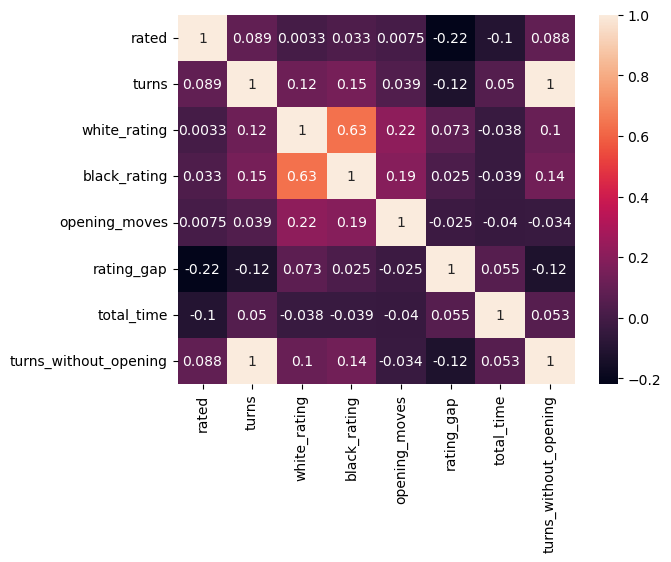

In [40]:
corr = df.drop(columns=['game_id']).corr(numeric_only=True)

sns.heatmap(corr, annot=True)

Se observa la distribución de movimientos realizados en la apertura, observando que la mayoría de los jugadores realizan entre 1 y 5 movimientos en la apertura.

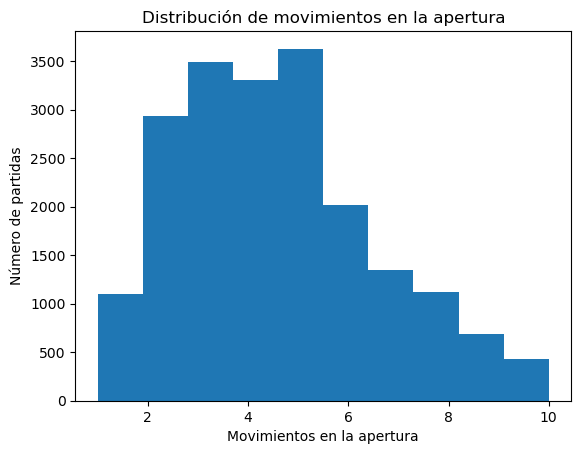

In [41]:
df['opening_moves'].plot(kind='hist', bins=10)
plt.xlabel('Movimientos en la apertura')
plt.ylabel('Número de partidas')
plt.title('Distribución de movimientos en la apertura')

plt.show()

Se puede observar que jugar con las blancas te da una leve ventaja, ya que el porcentaje de victorias es mayor que el de empates y derrotas.

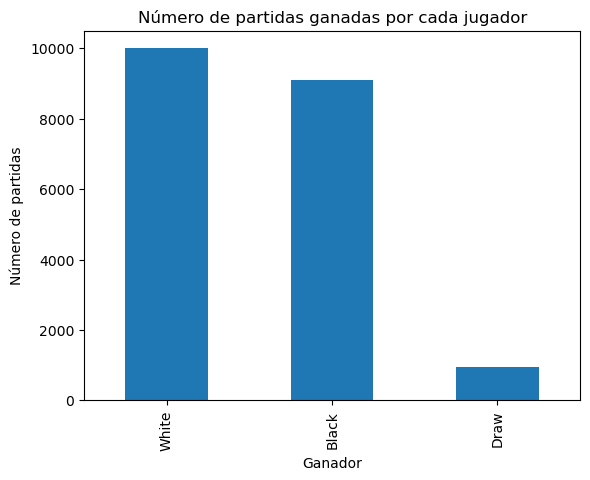

In [45]:
df['winner'].value_counts().plot(kind='bar')
plt.ylabel('Número de partidas')
plt.xlabel('Ganador')
plt.title('Número de partidas ganadas por cada jugador')

plt.show()

Se trata de observar si los jugadores con mayor rating, juegan más o menos turnos, y se observa que no hay una correlación clara.

<Axes: xlabel='black_rating', ylabel='turns'>

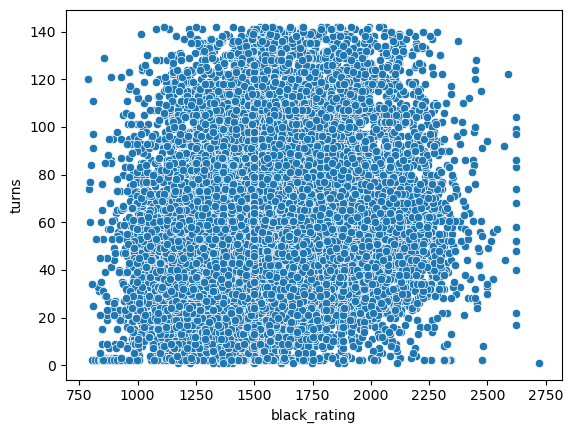

In [48]:
sns.scatterplot(x='black_rating', y='turns', data=df)

<Axes: xlabel='white_rating', ylabel='turns'>

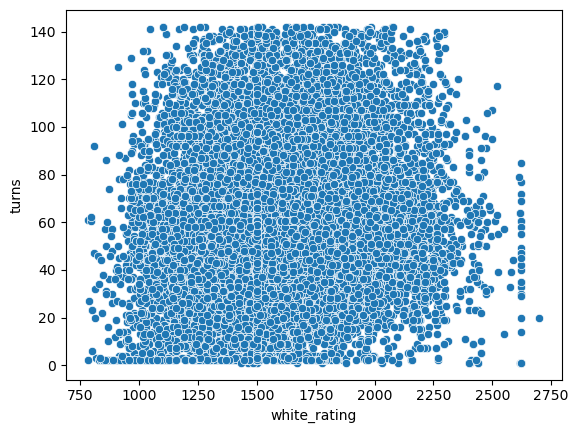

In [49]:
sns.scatterplot(x='white_rating', y='turns', data=df)

Al ver la diferencia entre rating, se puede observar que la mayoría de los jugadores tienen un rating similar, y que la diferencia de rating entre los jugadores es mínima.

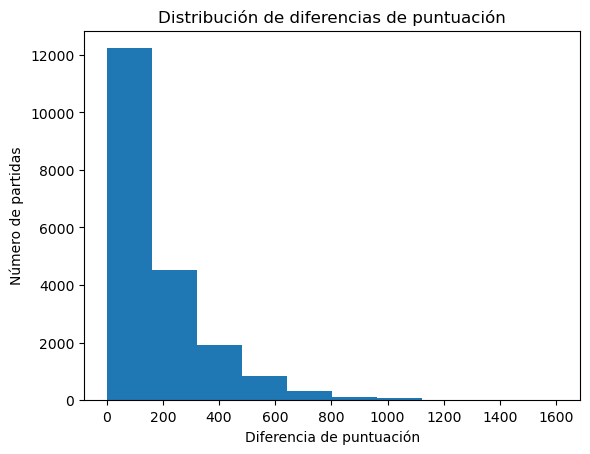

In [52]:
plt.hist(df['rating_gap'], bins=10)
plt.xlabel('Diferencia de puntuación')
plt.ylabel('Número de partidas')
plt.title('Distribución de diferencias de puntuación')

plt.show()

Se visualiza si al haber una diferencia de rating entre los jugadores, hay una tendencia clara en el resultado de la partida, y se observa que no hay una tendencia clara.

<Axes: xlabel='winner', ylabel='rating_gap'>

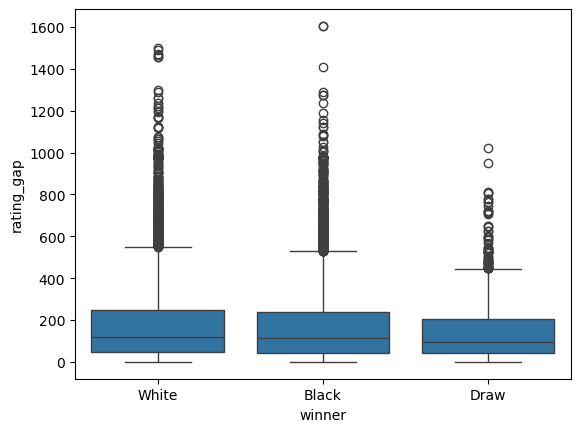

In [54]:
sns.boxplot(x='winner', y='rating_gap', data=df)

Se observa los movimientos más populares en la apertura, siendo e4 el movimiento más popular.

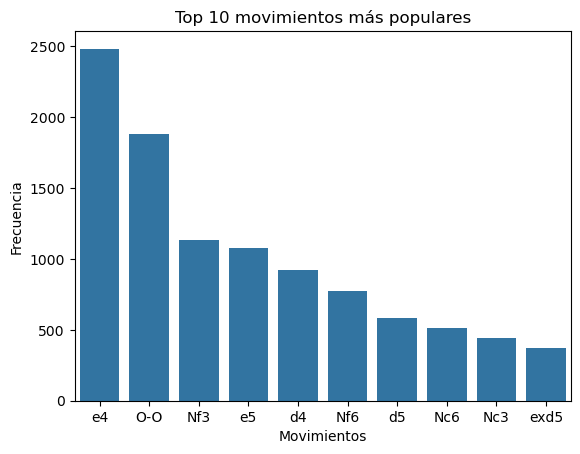

In [62]:
top_10_aperturas = df['most_used_movement'].value_counts().nlargest(10)

sns.barplot(x=top_10_aperturas.index, y=top_10_aperturas.values)
plt.xlabel('Movimientos')
plt.ylabel('Frecuencia')
plt.title('Top 10 movimientos más populares')
plt.show()

<Axes: xlabel='winner'>

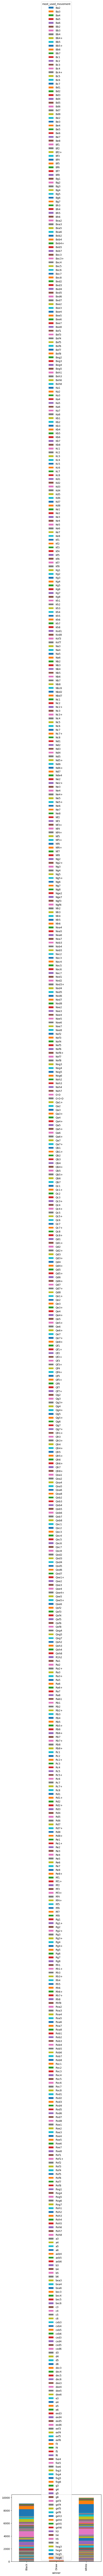

In [63]:
df.groupby('winner')['most_used_movement'].value_counts().unstack().plot(kind='bar', stacked=True)